In [3]:
import pandas as pd

photos = pd.read_csv('photos.csv',encoding='latin-1')
depeches = pd.read_csv('depeches.csv')
score_photos = pd.read_csv("scores_freq_photos1.csv")
score_depeches = pd.read_csv("scores_freq_depeches.csv")

In [2]:
score_photos.shape

(150536, 3)

In [2]:
import pandas as pd

score_photos = pd.read_csv("scores_freq_photos1.csv")
#score_depeches = pd.read_csv("scores_freq_depeches.csv")
#score_depeches

In [15]:
score_photos.scores[19]

"{'Anett Kontaveit': 1.829787234, 'Estonia': 0.8297872340000001, 'Estonia Dubai Tennis Championships': 0.8297872340000001, 'Petra Martic': 0.8297872340000001, 'Croatia': 0.8297872340000001, 'Dubai': 0.8297872340000001}"

In [6]:
photos.shape

(360999, 45)

In [4]:
pd.set_option("display.max_colwidth",100)
pd.set_option("display.max_columns",500)


In [5]:
photos.dropna(subset=['event'], inplace= True)
depeches.drop_duplicates(subset=['news2','event'], keep='first', inplace=True)
depeches.shape
photos.drop_duplicates(subset='caption', keep='first', inplace=True)
photos.shape
def author_del_photos(text):
    text_s = text
    while(text_s[-7:] != ' / AFP ' and len(text_s) > 1): 
        text_s = text_s[:-1]
    if(len(text_s) <= 1):
        return(text)
    return(text_s[:-7])
photos.caption = photos.caption.apply(author_del_photos)      
depeches.news2 = depeches.news2.apply(lambda x: x.replace('\n', ' '))

In [4]:
liste_ev_unique_depeches, liste_ev_unique_photos = [],[]
for ev in depeches.event:
    for _ev in ev[1:-1].replace("'","").split(', '):
        if _ev not in liste_ev_unique_depeches:
            liste_ev_unique_depeches.append(_ev)
print(len(liste_ev_unique_depeches))
liste_ev_unique_photos = []
for ev in photos.event:

    for _ev in ev[1:-1].replace("'","").split(', '):
        if _ev not in liste_ev_unique_photos:
            liste_ev_unique_photos.append(_ev)
print(len(liste_ev_unique_photos))

13335
16055


In [10]:
# Combien d'evenements sont dans depeches mais pas dans  photos? 
c=0 
for k in liste_ev_unique_depeches:
    if k not in liste_ev_unique_photos:
        c+=1 
print( "Il y a",c," evenements parmi", len(liste_ev_unique_depeches)," evenements dans depeches qui ne sont pas dans photos")

c=0 
for k in liste_ev_unique_photos:
    if k not in liste_ev_unique_depeches:
        c+=1 
print( "Il y a",c," evenements parmi ", len(liste_ev_unique_photos)," dans photos qui ne sont pas dans depeches")
# Combien de depeches ont des evenements dans photos ? 


Il y a 10356  evenements parmi 13335  evenements dans depeches qui ne sont pas dans photos
Il y a 13076  evenements parmi  16055  dans photos qui ne sont pas dans depeches


In [5]:
# Combien de depeches ont au moins un evenement en commun avec une photo  ? 
# Index_inter est l'index des depeches qui ont au moins un evenement en commun avec une photo. 
from tqdm import tqdm_notebook
c= 0 
index_inter = []
for i in tqdm_notebook((depeches.index)):
    L = depeches.event[i][1:-1].replace("'","").split(', ')
    nb = len(L)
    for j in L:
        if j in liste_ev_unique_photos and nb>1:
            c+=1
            index_inter.append(i)
            break
        if j in liste_ev_unique_photos and nb==1:
            c+=1
            index_inter.append(i)
c
     

/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


10137

In [43]:
from tqdm import tqdm_notebook

In [20]:
index_inter

[0,
 4,
 7,
 14,
 17,
 19,
 22,
 25,
 33,
 35,
 46,
 50,
 55,
 58,
 60,
 61,
 64,
 65,
 66,
 71,
 72,
 73,
 75,
 78,
 80,
 81,
 83,
 84,
 86,
 88,
 89,
 94,
 100,
 102,
 103,
 106,
 107,
 111,
 114,
 115,
 121,
 122,
 123,
 127,
 128,
 132,
 133,
 135,
 136,
 138,
 139,
 140,
 142,
 143,
 149,
 151,
 152,
 155,
 156,
 157,
 162,
 165,
 167,
 169,
 170,
 171,
 172,
 174,
 175,
 177,
 178,
 185,
 187,
 195,
 198,
 201,
 204,
 205,
 206,
 208,
 214,
 217,
 221,
 222,
 224,
 229,
 230,
 232,
 233,
 234,
 235,
 238,
 243,
 244,
 247,
 248,
 250,
 253,
 254,
 256,
 257,
 258,
 260,
 261,
 264,
 270,
 272,
 276,
 277,
 281,
 283,
 288,
 292,
 293,
 295,
 298,
 299,
 300,
 306,
 308,
 310,
 317,
 321,
 322,
 326,
 331,
 332,
 333,
 334,
 336,
 337,
 339,
 340,
 341,
 342,
 344,
 345,
 348,
 350,
 351,
 353,
 354,
 355,
 367,
 369,
 371,
 376,
 383,
 385,
 389,
 391,
 396,
 398,
 407,
 416,
 418,
 420,
 427,
 428,
 432,
 433,
 445,
 449,
 450,
 455,
 457,
 468,
 469,
 471,
 472,
 473,
 475,
 47

# Test d'association des depeches avec des photos
>  Pour les 100 premieres depeches.

In [6]:
from tqdm import tqdm_notebook as tq
import ast 
liste_scores1_photos=[]
for string in tq(score_photos.scores):
    liste_scores1_photos.append(ast.literal_eval(string))   

#liste_scores1_depeches=[]
#for string in score_depeches.scores:
#    liste_scores2.append(ast.literal_eval(string))    

/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [7]:
def normaliser_dict(l):
    
    for dico in l:
        m=0
        if len(dico) != 0 :
            m = max(dico.values())
            if m >0 : # Possible que m =0 si description en Francais...
                for k in dico.keys():
                    dico[k] /= m 
                    
normaliser_dict(liste_scores1_photos)
scoring = pd.read_csv('scoring.csv', delimiter = ";")
dict_val = {}

for i in range(48):
    dict_val[scoring['function'][i]] = scoring['score_norm'][i]

In [8]:
import spacy 
import neuralcoref
#Toute cette cellule est issue de l'autre notebook (création du csv) et permet donc d'avoir toutes les fonctions
#définies dans ce dernier à disposition.


#On importe le fichier contenant les scores de chaque fonction grammaticale


#On importe un modèle md pour avoir des mots vectorisés
nlp=spacy.load("en_core_web_md")  
neuralcoref.add_to_pipe(nlp,greedyness=0.5)

/Users/ya/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: spacy.morphology.Morphology size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject
  return f(*args, **kwds)
/Users/ya/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: spacy.vocab.Vocab size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
  return f(*args, **kwds)


In [9]:
def dep_ent(ent, doc):
    """ Retourne la fonction grammaticale :  la 'dep', d'une entité. Cette fonction est nécessaire car elle permet d'affecter
    une dep à une entité composée de plusieurs mots ayant chacun une dep de base.
    Traite aussi le cas particulier des mots étant des conj ou des compound : leur vrai dep et celle du mot auxquels
    ils sont associés en tant que conj ou compound."""
    start= ent.start
    end=ent.end
    for k in range(start,end):
        if doc[k].head.text not in ent.text: 
            if doc[k].dep_=='conj':     
                tok=doc[k]            
                while tok.dep_=='conj':
                    tok=tok.head      
                return(tok.dep_)
            
            if doc[k].dep_=='compound':   
                tok=doc[k]            
                while tok.dep_=='compound':
                    tok=tok.head      
                return(tok.dep_)
            return(doc[k].dep_)    
    return doc[start].dep_

## RAJOUT DE FAC
def ent_good_type(ent): #filtre les entités selon leur type 
    return (ent.label_ == "PERSON"or ent.label_ == "NORP" or ent.label_ == "ORG" or ent.label_ == "GPE" or ent.label_ == "EVENT" or ent.label_ == "LOC" or ent.label_ == "FAC")

def sort_ent(doc):
    """Retourne la liste des entités en les filtrant selon leur type et en les triant de manière à avoir au début de
    la liste les entités ayant des coréférences."""
    ent_coref=[ent for ent in doc.ents if ent._.is_coref and ent_good_type(ent)]
    ent_vanilla=[ent for ent in doc.ents if ent_good_type(ent) and not ent._.is_coref]
    return ent_coref + ent_vanilla

def scores_doc(doc):
    """Retourne le score de chaque entité pour la méthode sans neuralcoref."""
    res={}
    for ent in doc.ents:
        if ent.text not in res.keys():
            res[ent.text]=dict_val[dep_ent(ent,doc)]
        else:
            res[ent.text]+=dict_val[dep_ent(ent,doc)]
    return res

def scores_doc_coref1(doc):
    """Retourne le score de chaque entité pour la méthode de base opérée sur le document resolved.
    Le document resolved est le document de base dans lequel toutes les références à un groupe de mot sont remplacées
    par celui-ci.
    Par exemple : My dad is home. He watches TV devient My dad is home. My dad watches TV.
    En raisonnant avec le nlp sur le document resolved, le nlp va détecter beaucoup plus de fois la même entité.
    Le principal inconvénient est que toutes les références sont remplacées, y compris celles qui ne sont pas associées 
    à des entités mais plutôt à des très longs bouts de phrase qui sont repris par un pronom comme "it"  """
    
    doc=nlp(doc._.coref_resolved)
    res={}
    for ent in doc.ents:
        if ent_good_type(ent):
            if ent.text not in res.keys():
                res[ent.text]=dict_val[dep_ent(ent,doc)]
            else:
                res[ent.text]+=dict_val[dep_ent(ent,doc)]
    #normaliser_dict
    m=0
    if len(res) != 0 :
        m = max(res.values())
    if m >0 : # Possible que m =0 si description en Francais...
        for k in res.keys():
            res[k] /= m 

    return res

def is_in_cluster(ent,cluster):  #détermine si une entité est dans une des mentions d'un cluster
    for span in cluster.mentions:
        if ent.text in span.text:
            return True
    return False



def freq_dict(L):
    n = len(L)
    L_unique = list(set(L))
    d = {}
    for a in L_unique:
        for b in L:
            if a == b:
                if a in d.keys():
                    d[a] += 1/n
                else:
                    d[a] = 1/n
    return(d)

In [74]:

def score_sim1(doc,score_doc,k):
    """Prend en paramètre un doc, le fichier de scores associés à ce doc et un entier k correspondant à l'indice de la 
    description avec laquelle on veut comparer le doc. Retourne le score de similarité entre le doc et la description.
    Ici on calcule le score avec la méthode neuralcoref1 : on utilise liste_scores1."""
    res=0
    score_image=liste_scores1_photos[k]
    for i in score_doc.keys():
        if i in score_image.keys():
            res += (score_doc[i]+score_image[i])
    return res


def score_scalaire(doc,score_doc,k):
    """Prend en paramètre un doc, le fichier de scores associés à ce doc et un entier k correspondant à l'indice de la 
    description avec laquelle on veut comparer le doc. Retourne le score de similarité entre le doc et la description.
    Ici on calcule le score avec la méthode neuralcoref1 : on utilise liste_scores1."""
    res=0
    score_image=liste_scores1_photos[k]
    for i in score_doc.keys():
        if i in score_image.keys():
            res += (score_doc[i]*score_image[i]) 
    return res

def score_sim11(doc,score_doc,k):
    """Prend en paramètre un doc, le fichier de scores associés à ce doc et un entier k correspondant à l'indice de la 
    description avec laquelle on veut comparer le doc. Retourne le score de similarité entre le doc et la description.
    Ici on calcule le score avec la méthode neuralcoref1 : on utilise liste_scores1.
    Rajout d'une pénalité par entité différentes 
    """
    res=0
    score_image=liste_scores1_photos[k]
    for i in score_doc.keys():
        if i in score_image.keys():
            res += (score_doc[i]+score_image[i])
    score_image_tri = tri_dict(score_image)
    c = 0 
    for i in score_doc.keys():
        c+=1
        if i not in score_image_tri.keys():
            
            res -= 1/c
        
    return res

def score_sim11_malus(doc,score_doc,k):
    """Prend en paramètre un doc, le fichier de scores associés à ce doc et un entier k correspondant à l'indice de la 
    description avec laquelle on veut comparer le doc. Retourne le score de similarité entre le doc et la description.
    Ici on calcule le score avec la méthode neuralcoref1 : on utilise liste_scores1.
    Rajout d'une pénalité par entité différentes 
    """
    res=0
    score_image=liste_scores1_photos[k]
    for i in score_doc.keys():
        if i in score_image.keys():
            res += (score_doc[i]+score_image[i])
    score_image_tri = tri_dict(score_image)
    c = 0 
    for i in score_doc.keys():
        c+=1
        if i not in score_image_tri.keys():
            
            res -= score_image_tri[i]
        
    return res


def related_descr(doc):
    """Retourne la liste des indices correspondant aux descriptions ayant au moins 1 entité en commun avec le doc.
    Permet d'effectuer moins de comparaison dans la fonction best_image."""
    index_list=[]
    for k in range(len(liste_scores1_photos)):
        for ent in doc.ents:
            if ent.text in liste_scores1_photos[k].keys():
                index_list.append(k)
                break
    return index_list

def best_image1(doc):
    """Retourne l'indice de l'image dont la description correspond le plus au doc passé en paramètre.
    La correspondance (matching) se fait avec score_sim1."""
    best_score=0
    best_descr=0
    score_doc=scores_doc_coref1(doc)
    for k in range(len(liste_scores1_photos)):
        if score_sim1(doc,score_doc,k) > best_score:
            best_score=score_sim1(doc,score_doc,k)
            best_descr=k
    return best_descr



def best_image11(doc):
    """Retourne l'indice de l'image dont la description correspond le plus au doc passé en paramètre.
    La correspondance (matching) se fait avec score_sim11."""
    best_score=0
    best_descr=0
    score_doc=scores_doc_coref1(doc)
    for k in range(len(liste_scores1_photos)):
        if score_sim11(doc,score_doc,k) > best_score:
            best_score=score_sim11(doc,score_doc,k)
            best_descr=k
    return best_descr
                   
                   

def best_image11_malus(doc):
    """Retourne l'indice de l'image dont la description correspond le plus au doc passé en paramètre.
    La correspondance (matching) se fait avec score_sim11."""
    best_score=0
    best_descr=0
    score_doc=scores_doc_coref1(doc)
    for k in range(len(liste_scores1_photos)):
        if score_sim11(doc,score_doc,k) > best_score:
            best_score=score_sim11_malus(doc,score_doc,k)
            best_descr=k
    return best_descr


def best_image_scalaire(doc):
    """Retourne l'indice de l'image dont la description correspond le plus au doc passé en paramètre.
    La correspondance (matching) se fait avec score_sim11."""
    best_score=0
    best_descr=0
    score_doc=scores_doc_coref1(doc)
    for k in range(len(liste_scores1_photos)):
        if score_scalaire(doc,score_doc,k) > best_score:
            best_score=score_sim11_malus(doc,score_doc,k)
            best_descr=k
    return best_descr
                   


In [11]:
photos['index'] = range(photos.shape[0])
photos.set_index('index',inplace=True)

In [12]:
def tri_dict(d): 
    """Tri décroissant """

    d_sort = {}
    for k,v in sorted(d.items(), key =lambda x :x[1], reverse= True):
        d_sort[k]=v
    return d_sort
    
best_image11_malus(nlp(depeches.news2[4]))

11100

In [13]:
%%time
def event_commun(k): 
    L = []
    event = depeches.event[k][1:-1].split((','))
    for c in event: 
        for i in range(photos.shape[0]):
            if c in (photos.event[i][1:-1].split(',')):
                L.append(i)
    return L
            


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.3 µs


In [56]:
%%time
event_commun(7)

CPU times: user 9.11 s, sys: 60 ms, total: 9.17 s
Wall time: 9.58 s


[20598,
 20654,
 19930,
 19931,
 20233,
 20238,
 20239,
 20240,
 20255,
 20261,
 20263,
 20265,
 20266,
 20268,
 20269,
 20280,
 20281,
 20397]

In [14]:
def best_images(k, malus1 = False, malus2 =False, scalaire=False ):
    """ Retourne les  meilleures ( best score) photos de la k eme dépèche"""
    doc = nlp(depeches.news2[k])
    L_score =[]
    score_doc=scores_doc_coref1(doc)

    if malus1 : 
        for j in range(len(liste_scores1_photos)):
            L_score.append( (score_sim11(doc,score_doc,j),j)) 
    elif malus2:
        for j in range(len(liste_scores1_photos)):
            L_score.append( (score_sim11_malus(doc,score_doc,j),j)) 
    elif scalaire:
        for j in range(len(liste_scores1_photos)):
            L_score.append( (score_scalaire(doc,score_doc,j),j)) 
            
    else : 
         for j in range(len(liste_scores1_photos)):
            L_score.append( (score_sim1(doc,score_doc,j),j)) 
    L_score.sort(reverse=True)
    
    return L_score


In [15]:
def best_images_d(doc, malus1 = False, malus2 =False, scalaire=False ):
    """ Retourne les  meilleures ( best score) photos de la k eme dépèche"""
    #doc = nlp(depeches.news2[k])
    L_score =[]
    score_doc=scores_doc_coref1(doc)

    if malus1 : 
        for j in range(len(liste_scores1_photos)):
            L_score.append( (score_sim11(doc,score_doc,j),j)) 
    elif malus2:
        for j in range(len(liste_scores1_photos)):
            L_score.append( (score_sim11_malus(doc,score_doc,j),j)) 
    elif scalaire:
        for j in range(len(liste_scores1_photos)):
            L_score.append( (score_scalaire(doc,score_doc,j),j)) 
            
    else : 
         for j in range(len(liste_scores1_photos)):
            L_score.append( (score_sim1(doc,score_doc,j),j)) 
    L_score.sort(reverse=True)
    
    return L_score


In [64]:
%%time
best_images(1, scalaire=False)

CPU times: user 2.06 s, sys: 123 ms, total: 2.18 s
Wall time: 1.65 s


[(6.535428459455265, 93240),
 (6.3625552188960555, 17325),
 (6.195879608250071, 9814),
 (6.118290064263026, 20142),
 (6.118290064263026, 20140),
 (6.0724185045073655, 17333),
 (5.651698053141142, 12834),
 (5.5911837076997655, 9365),
 (5.578216889708646, 20608),
 (5.5678313489198725, 20181),
 (5.537582488980954, 19947),
 (5.494436853483293, 8544),
 (5.479149290446865, 20024),
 (5.353452438715472, 18336),
 (5.347843060309739, 93343),
 (5.347843060309739, 93232),
 (5.320702034440267, 93164),
 (5.274448564873159, 93327),
 (5.274448564873159, 93285),
 (5.274448564873159, 93186),
 (5.274448564873159, 93181),
 (5.274448564873159, 93175),
 (5.210813976572764, 5168),
 (5.206129220919872, 105068),
 (5.114920328762185, 93390),
 (5.114920328762185, 93355),
 (5.114920328762185, 93351),
 (5.087397393081266, 93423),
 (5.072911637908441, 8948),
 (5.041525833325606, 93340),
 (5.027844842361409, 8542),
 (5.005897772683463, 93227),
 (4.974569451482407, 93348),
 (4.974569451482407, 93330),
 (4.97456945148

### Comment tester : 
> Chaque point un nouveau compteur
*  Compter un si la meilleure photo a des evenements en commun avec la depeche
*  Compter un si une des 10 meilleures photos a des evenements en commun avec la depèche 
*  De meme avec 5. 
*  Faire le graphe la position de la premiere photo ayant un evenement en commun 


# Afficher la distibution 

Avec malus

In [127]:
%%time
import matplotlib.pyplot as plt
#P,P1,P11_malus,P_scalaire = [],[],[],[]
#c1,c11,c11_malus = 0,0,0
#c2,c22,c22_malus = 0,0,0 
#c3,c33,c33_malus = 0,0,0

for k in tqdm_notebook(index_inter_filtre[300:1000]): # 186 et 233 bug 
    doc = nlp(depeches.news2[k])
    liste_event_commun = event_commun(k)
    L = best_images_d(doc)
   
    if  L != [] :
        if L[0][1] in liste_event_commun:
                c1+=1
        position = -20
        j=0
        while position == -20 and j<len(L):

            if L[j][1] in liste_event_commun:
                position = j + 1
                score_com = L[j][0]

            j+=1
        if position<=5 and position != -20: 
            c2+=1
        if position<=10 and position != -20:
            c3+=1
        P.append(position)

    L1 = best_images_d(doc,malus1=True)
   
    if  L1 != [] :
        if L1[0][1] in liste_event_commun:
                c11+=1
        position = -20
        j=0
        while position == -20 and j<len(L1):

            if L1[j][1] in liste_event_commun:
                position = j + 1
                score_com = L1[j][0]

            j+=1
        if position<=5 and position != -20: 
            c22+=1
        if position<=10 and position != -20:
            c33+=1
        P1.append(position)
        
        
    L2 = best_images_d(doc,malus2=True)
   
    if  L2 != [] :
        if L2[0][1] in liste_event_commun:
                c11_malus+=1
        position = -20
        j=0
        while position == -20 and j<len(L2):

            if L2[j][1] in liste_event_commun:
                position = j + 1
                score_com = L2[j][0]

            j+=1
        if position<=5 and position != -20: 
            c22_malus+=1
        if position<=10 and position != -20:
            c33_malus+=1
        P11_malus.append(position)

    L3 = best_images_d(doc,scalaire=True)   
    if  L3 != [] :
       
        position = -20
        j=0
        while position == -20 and j<len(L3):

            if L3[j][1] in liste_event_commun:
                position = j + 1
                score_com = L3[j][0]

            j+=1
        
        P_scalaire.append(position)

    
    


/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



CPU times: user 1h 44min 1s, sys: 1min 57s, total: 1h 45min 59s
Wall time: 1h 41min 7s


In [128]:
c_naif, c_scalaire, c_pos, c_mal = 0,0,0,0
for k in range(len(P)):
    if P[k]<=20:
        c_naif+=1
    if P_scalaire[k]<=20:
        c_scalaire+=1
    if P1[k]<=20:
        c_pos+=1
    if P11_malus[k]<=20:
        c_mal+=1
        

In [131]:
P

[76,
 604,
 130001,
 901,
 139236,
 26,
 592,
 632,
 335,
 430,
 663,
 711,
 -20,
 743,
 366,
 149614,
 -20,
 139245,
 248,
 149614,
 1023,
 64,
 1686,
 616,
 5512,
 3560,
 149614,
 171,
 2291,
 149614,
 125229,
 1651,
 125657,
 149748,
 957,
 65,
 140494,
 -20,
 125251,
 10326,
 145647,
 1410,
 189,
 10,
 831,
 146782,
 4888,
 124972,
 145199,
 149764,
 -20,
 125248,
 147939,
 10,
 -20,
 905,
 144961,
 435,
 160,
 1238,
 559,
 1130,
 591,
 592,
 29,
 4035,
 -20,
 2,
 149803,
 1166,
 3475,
 294,
 130455,
 5729,
 648,
 153,
 334,
 118,
 592,
 -20,
 282,
 69346,
 -20,
 1926,
 863,
 9409,
 440,
 72705,
 579,
 979,
 563,
 1294,
 -20,
 898,
 49,
 139236,
 2036,
 560,
 163,
 139061,
 569,
 540,
 104,
 664,
 69,
 142453,
 1,
 182,
 357,
 -20,
 608,
 142513,
 102,
 376,
 299,
 -20,
 886,
 -20,
 12,
 721,
 149614,
 4007,
 604,
 149642,
 149634,
 31,
 65,
 149638,
 70060,
 12,
 26,
 229,
 111,
 265,
 148045,
 144709,
 147938,
 147967,
 -20,
 143348,
 305,
 148071,
 8,
 19,
 136358,
 75604,
 238,

In [113]:
trop.remove(11595)
trop.remove(11636)
trop.remove(11726)
trop.remove(15011)

In [117]:
index_inter_filtre = [ k for k in index_inter if k not in trop]

In [120]:
len(index_inter_filtre)

9856

In [129]:
print(' précision naive', c_naif/len(P), "\n Precision scalaire",c_scalaire/len(P), "\n Precison malus position" , c_pos/len(P), "\n Precision malus ", c_mal/len(P) )

 précision naive 0.2022022022022022 
 Precision scalaire 0.1981981981981982 
 Precison malus position 0.22022022022022023 
 Precision malus  0.2092092092092092


(array([ 93., 104.,  55.,  28.,  29.,  19.,  13.,  11.,  13.,  10.,  13.,
          7.,   8.,   7.,   7.,   9.,   7.,   4.,  10.,   7.,   6.,   2.,
          4.,   4.,   5.,   1.]),
 array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360., 380., 400.,
        420., 440., 460., 480., 500.]),
 <a list of 26 Patch objects>)

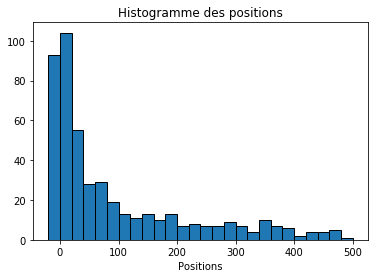

In [132]:
plt.xlabel('Positions')
plt.title('Histogramme des positions')
plt.hist(P, range=(-20,500), bins= 26, edgecolor = 'black' )

(array([ 93., 103.,  39.,  26.,  21.,  21.,  11.,  10.,   7.,  13.,  13.,
         14.,   8.,   6.,   6.,   9.,   6.,   7.,   4.,   6.,   3.,   4.,
          5.,   3.,   5.,   5.]),
 array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360., 380., 400.,
        420., 440., 460., 480., 500.]),
 <a list of 26 Patch objects>)

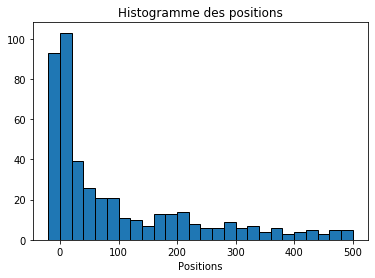

In [133]:
plt.xlabel('Positions')
plt.title('Histogramme des positions')
plt.hist(P_scalaire, range=(-20,500), bins= 26, edgecolor = 'black' )


(array([ 93., 120.,  48.,  54.,  34.,  32.,  15.,  13.,  16.,  15.,  16.,
         16.,  11.,   5.,   9.,   5.,   7.,   2.,   3.,   5.,   5.,   5.,
          7.,   7.,   3.,   3.]),
 array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360., 380., 400.,
        420., 440., 460., 480., 500.]),
 <a list of 26 Patch objects>)

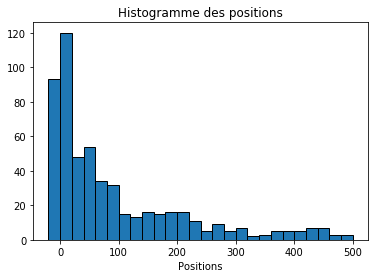

In [134]:
plt.xlabel('Positions')
plt.title('Histogramme des positions')
plt.hist(P1,range=(-20,500), bins= 26, edgecolor = 'black' )


(array([ 93., 114.,  75.,  15.,  36.,  44.,  26.,  24.,  14.,  17.,   8.,
          8.,  11.,   6.,  11.,   7.,   5.,   1.,   2.,   3.,   2.,   3.,
          5.,   2.,   4.,   2.]),
 array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360., 380., 400.,
        420., 440., 460., 480., 500.]),
 <a list of 26 Patch objects>)

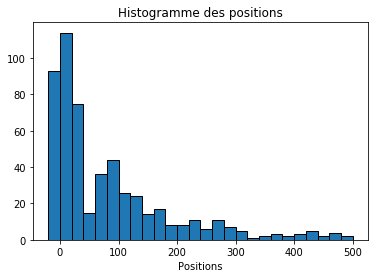

In [136]:
plt.xlabel('Positions')
plt.title('Histogramme des positions')
plt.hist(P11_malus,range=(-20,500), bins= 26, edgecolor = 'black' )


In [205]:
%%time
import matplotlib.pyplot as plt
#P_sansmalus = []
#c1 = 0 
#c2 = 0 
#c3 = 0
for k in tqdm_notebook(index_inter[300:1000]):
    liste_event_commun = event_commun(k)
    L = best_images(k,False)
   
    if  L != [] :
        if L[0][1] in liste_event_commun:
                c1+=1
        position = -20
        j=0
        while position == -20 and j<len(L):

            if L[j][1] in liste_event_commun:
                position = j + 1
                score_com = L[j][0]

            j+=1
        if position<=5 and position != -20: 
            c2+=1
        if position<=10 and position != -20:
            c3+=1
        P_sansmalus.append(position)

        
    
    
    

/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


KeyboardInterrupt: 

(array([96., 30., 15.,  6.,  7.,  2.,  6.,  3.,  2.,  6.,  3.,  3.,  4.,
         4.,  2.,  5.,  4.,  2.,  4.,  4.,  2.,  1.,  2.,  2.,  1.,  0.]),
 array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360., 380., 400.,
        420., 440., 460., 480., 500.]),
 <a list of 26 Patch objects>)

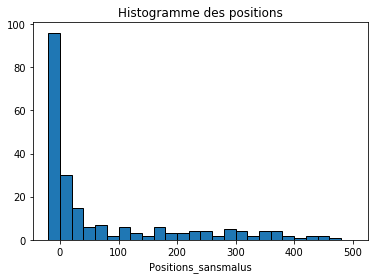

In [201]:
plt.xlabel('Positions_sansmalus')
plt.title('Histogramme des positions')
plt.hist(P_sansmalus, range=(-20,500), bins= 26, edgecolor = 'black' )


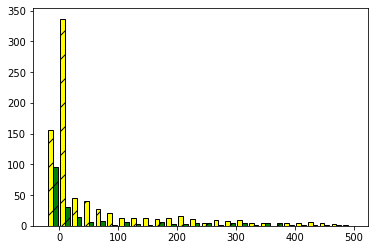

In [202]:
%matplotlib inline
plt.hist([P, P_sansmalus], bins =26,range= (-20,500), color = ['yellow', 'green'], edgecolor = 'black', hatch = '/', label = ['avec malus', 'sans malus'], histtype = 'bar')
plt.show()

(array([95., 25., 15.,  6.,  7.,  2.,  6.,  2.,  2.,  6.,  3.,  3.,  4.,
         4.,  2.,  5.,  4.,  2.,  4.,  4.,  2.,  1.,  2.,  2.,  1.,  0.]),
 array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.,
        200., 220., 240., 260., 280., 300., 320., 340., 360., 380., 400.,
        420., 440., 460., 480., 500.]),
 <a list of 26 Patch objects>)

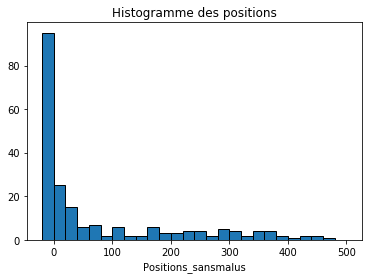

In [52]:
plt.xlabel('Positions_sansmalus')
plt.title('Histogramme des positions')
plt.hist(P_sansmalus, range=(-20,500), bins= 26, edgecolor = 'black' )


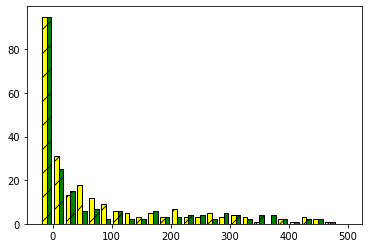

In [119]:
%matplotlib inline
plt.hist([P, P_sansmalus], bins =26,range= (-20,500), color = ['yellow', 'green'], edgecolor = 'black', hatch = '/', label = ['avec malus', 'sans malus'], histtype = 'bar')
plt.show()
# bar est le defaut

In [58]:
d = 0 
v= 0 
for k in P: 
    if 0<=k<=100:
        d+=1
for k in P_sansmalus:
    if 0<=k<=100:
        v+=1
print('le nombre de dépeches dans le top 100 sans malus est de' ,v , '\nle nombre de dépeches dans le top 100 avec malus est de' ,d)
        


le nombre de dépeches dans le top 100 sans malus est de 55 
le nombre de dépeches dans le top 100 avec malus est de 83


In [59]:
d = 0 
v= 0 
for k in P: 
    if 0<=k<=10:
        d+=1
for k in P_sansmalus:
    if 0<=k<=10:
        v+=1

print('le nombre de dépeches dans le top 10 sans malus est de' ,v , '\nle nombre de dépeches dans le top 10 avec malus est de' ,d)
        

le nombre de dépeches dans le top 10 sans malus est de 15 
le nombre de dépeches dans le top 10 avec malus est de 20


In [35]:
%%time
import matplotlib.pyplot as plt

for k in tqdm_notebook(index_inter[95+22:150]):
    liste_event_commun = event_commun(k)
    L = best_images(k,True)
   
    if  L != [] :
        if L[0][1] in liste_event_commun:
                c1+=1
        position = -1000
        j=0
        while position == -1000 and j<len(L):

            if L[j][1] in liste_event_commun:
                position = j + 1
                score_com = L[j][0]

            j+=1
        if position<=5 and position != -1000: 
            c2+=1
        if position<=10 and position != -1000:
            c3+=1
        P.append(position)

        

/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



CPU times: user 11min 4s, sys: 10.5 s, total: 11min 14s
Wall time: 11min 50s


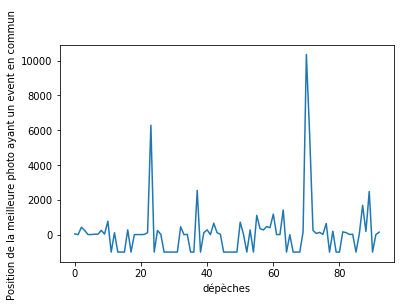

In [29]:
plt.xlabel("dépèches")  
plt.ylabel("Position de la meilleure photo ayant un event en commun ")
plt.plot(range(len(P)),P)  
plt.show()
    

In [30]:
print("Nombre perfect match" , c1, "\n <=5", c2 , " \n <=10", c3 , " sur 150 photos" )

Nombre perfect match 3 
 <=5 8  
 <=10 13  sur 150 photos


## Test article 

In [16]:
df = pd.read_csv('base_articles.csv')
df = df.dropna(subset= ['Article'])
df.Article = df.Article.apply(lambda x: x.replace("\n"," "))

In [157]:
df.shape

(5, 3)

In [75]:
%%time
v =nlp(df.Article[0])

CPU times: user 3.18 s, sys: 297 ms, total: 3.47 s
Wall time: 2.52 s


In [74]:
a = scores_doc_coref1(nlp(df.Article[0]))

In [68]:
%%time 
def article_best_images(article, malus):
    """ Retourne les  meilleures ( best score) photos de la k eme dépèche"""
    doc = nlp(article)
    #doc = nlp(depeches.news2[10])
    L_score =[]
    score_doc=scores_doc_coref1(doc)
    #rel = related_descr(doc)
    if malus : 
        for j in range(len(liste_scores1_photos)):
            L_score.append( (score_sim11(doc,score_doc,j),j)) 
    else : 
         for j in range(len(liste_scores1_photos)):
            L_score.append( (score_sim1(doc,score_doc,j),j)) 
    L_score.sort(reverse=True)
    
    return L_score



CPU times: user 43 µs, sys: 713 µs, total: 756 µs
Wall time: 3.66 ms


In [33]:
# df base de 5 articles sur la korea 
result_malus =article_best_images(df.Article[2], True)
result = article_best_images(df.Article[2], False)


In [31]:
result,result_malus

([(5.479528789009752, 55569),
  (5.333246414559395, 6315),
  (5.333246414559395, 6314),
  (5.333246414559395, 6313),
  (5.333246414559395, 6312),
  (5.333246414559395, 6311),
  (5.333246414559395, 6310),
  (5.333246414559395, 6309),
  (4.777401130009752, 55571),
  (4.538374619749401, 7989),
  (4.515432649978189, 7094),
  (4.515432649978189, 7093),
  (4.406752100434987, 124434),
  (4.39508720259515, 69033),
  (4.39508720259515, 66615),
  (4.351099891817386, 7782),
  (4.327371078236281, 10358),
  (4.327371078236281, 7568),
  (4.289178617946705, 80417),
  (4.289178617946705, 80416),
  (4.289178617946705, 80415),
  (4.289178617946705, 80414),
  (4.289178617946705, 66616),
  (4.289178617946705, 66610),
  (4.160973489401669, 78857),
  (4.160973489401669, 78855),
  (4.051990540058327, 7753),
  (4.051990540058327, 7752),
  (4.051990540058327, 7751),
  (4.051990540058327, 7658),
  (4.051990540058327, 7657),
  (4.051990540058327, 7656),
  (4.051990540058327, 7655),
  (4.051990540058327, 7654),
 

In [32]:
df.Article[2]

'Written by Marianna Cerini, CNN  Priyanka Chopra is an actress, producer, philanthropist, singer and former Miss World. And, as has become evident in recent seasons, she is also a style icon.  Chopra\'s aesthetic has evolved over the past few years, transforming her from girl next door to fashion queen, both on and off the red carpet.  -- in equal measure -- wearing international brands and championing Indian designers and classic Indian dress. Chopra even caused a spike in online searches for the terms "golden saree" and "red lehenga" when she wore them to her She\'s done so by-- in equal measure -- wearing international brands and championing Indian designers and classic Indian dress. Chopra even caused a spike in online searches for the terms "golden saree" and "red lehenga" when she wore them to her wedding to pop singer Nick Jonas in December 2018.                      1 / 11 Priyanka Chopra attends the Met Gala on May 1, 2017 in New York City. Credit: Neilson Barnard/Getty Image

In [34]:
from IPython.display import Image
from IPython.core.display import HTML 
L = [ photos.url_extracted[k[1]] for k in result[:10] ] 
for i in L :
    display(Image(url= i))
    

In [35]:
from IPython.display import Image
from IPython.core.display import HTML 
L = [ photos.url_extracted[k[1]] for k in result_malus[:10] ] 
for i in L :
    display(Image(url= i))
    

In [37]:
def display_phto(k,nb_photo):
    result_malus =article_best_images(df.Article[k], True)
    result_sansmalus =article_best_images(df.Article[k], False)
    print(df.Article[k])
    L_malus = [ photos.url_extracted[k[1]] for k in result_malus[:nb_photo] ] 
    L_sansmalus= [ photos.url_extracted[k[1]] for k in result_sansmalus[:nb_photo] ] 
    print('Sans malus')
    for i in L_sansmalus :
        display(Image(url= i))
    
    print('malus')
    for i in L_malus  :
        display(Image(url=i))
        
    

In [75]:
c= []
v = []
for d in tqdm_notebook(range(1,100)):
    L1,L2 = article_best_images(df.Article[d],False)[:10],article_best_images(df.Article[d],True )[:10]
    for k in range(3):
        if  not (L1[k][1]==L2[k][1]):
            v.append((L1,L2))
            c.append(d)
            break
        
        
    
    
    
print(c)

/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



[2, 3, 4, 10, 11, 15, 16, 17, 19, 23, 26, 33, 35, 38, 39, 41, 42, 45, 51, 53, 54, 55, 61, 63, 68, 71, 72, 74, 75, 78, 79, 82, 83, 84, 85, 87, 88, 89, 91, 95, 96, 97]


In [52]:
v[0][0][:6]

[(5.479528789009752, 55569),
 (5.333246414559395, 6315),
 (5.333246414559395, 6314),
 (5.333246414559395, 6313),
 (5.333246414559395, 6312),
 (5.333246414559395, 6311)]

In [76]:
for l in range(len(v)):    
    i=v[l]
    
    L_malus = [ photos.url_extracted[k[1]] for k in i[1][:6] ] 
    L_sansmalus= [ photos.url_extracted[k[1]] for k in i[0][:6]] 
    print(c[l], "\n",df.Article[c[l]])
    print('Sans malus')
    for i in L_sansmalus :
        display(Image(url= i))
    
    print('malus')
    for i in L_malus  :
        display(Image(url=i))

2 
 Written by Marianna Cerini, CNN  Priyanka Chopra is an actress, producer, philanthropist, singer and former Miss World. And, as has become evident in recent seasons, she is also a style icon.  Chopra's aesthetic has evolved over the past few years, transforming her from girl next door to fashion queen, both on and off the red carpet.  -- in equal measure -- wearing international brands and championing Indian designers and classic Indian dress. Chopra even caused a spike in online searches for the terms "golden saree" and "red lehenga" when she wore them to her She's done so by-- in equal measure -- wearing international brands and championing Indian designers and classic Indian dress. Chopra even caused a spike in online searches for the terms "golden saree" and "red lehenga" when she wore them to her wedding to pop singer Nick Jonas in December 2018.                      1 / 11 Priyanka Chopra attends the Met Gala on May 1, 2017 in New York City. Credit: Neilson Barnard/Getty Imag

malus


3 
 (CNN) Three US Marines stepped in to detain a passenger who allegedly made threatening comments during a flight from Japan to Texas.  according to an Capt. Daniel Kult, Sgt. John Dietrick, and Pfc. Alexander Meinhardt were headed to Texas from Tokyo on Monday when a passenger on their flight barricaded himself inside a bathroom and began screaming,according to an online statement from the Marine Corps.  Dietrick said that even through the headphones he was wearing he could hear someone inside the bathroom who sounded "distraught."  That's when the three Marines gathered outside the restroom while a flight attendant unlocked the door, according to the release. Once it was open, the Marines restrained the passenger with flex ties.  "I knew I had to step in when he became a danger to others and himself," Meinhardt said. "I didn't think twice about helping restrain him through the rest of the flight."  Read More
Sans malus


malus


4 
 Wellington, New Zealand (CNN) — It may be some time before tourists are traveling the globe again. But what if you could travel through designated, approved parts of it?  and New Zealand are discussing the possibility of opening up borders to each other, creating a travel corridor -- or "travel bubble" -- between the two nations. Politicians from Australia and New Zealand are discussing the possibility of opening up borders to each other, creating a travel corridor -- or "travel bubble" -- between the two nations.  "If there is any country in the world with whom we can reconnect with first, undoubtedly that's New Zealand," Australian Prime Minister Scott Morrison said last month.  Related content 12 of New Zealand's most beautiful places  "That is a situation we would all like to be in, but of course, our number one focus at the moment is making sure that both our countries are in the position where we're domestically managing Covid-19 to a point where we can with confidence open b

malus


10 
 Accra, Ghana (CNN) Funerals are a big deal in Ghana and it is not uncommon, in some parts, for a ceremony to last up to seven days, drawing thousands of crowds adorned in flowing red and black robes and gold jewelry.  Some families even hire professional mourners to cry at the funeral of their loved one because "it serves as a reward to the person who has died," says Adwoa Yeboah Agyei, who owns The Funeral Shop and Services, a franchise with locations across Accra.  Ghanaian funerals are heavily symbolic and rituals involved include giving offerings to the spirits of the ancestors and loud traditional dancing and drumming to accompany the dead on their journey.  Anguished families  But a centuries-old tradition has come to a halt.  Since Ghana's President Nana Akufo-Addo suspended all public gatherings in mid-March in the wake of the coronavirus pandemic, burials have been limited to no more than 25 people in the West African nation.  Obed Ampadu-Asiamah's 73-year-old father, Dan

malus


11 
 (CNN) Collins Omondi Okello's mission was simple. Get his hero Steve Harvey to see the portrait he had made of him.  First, the Kenyan artist posted his unfinished drawing of Harvey, shared the process on Twitter and urged his followers to retweet and tag the US entertainer.  Once the drawing was complete, he posted the photo and tagged Steve Harvey, hoping he would see it.  "Complete pencil drawing of @IAmSteveHarvey. Will be a real boost to my hustle if you have this in your gallery. Waiting with bated breath," Okello wrote on Twitter.  Complete! Pencil drawing of @IAmSteveHarvey. Will be a real boost to my hustle if you have this in your gallery. Waiting with bated breath🙏🙏🙏#steveharveypencil #JaduongArtWorks pic.twitter.com/MRxql0pbKh pic.twitter.com/gk2v7ki3bL — Collins Omondi Okello (@collimondi) March 1, 2020  His persistence paid off and three days and thousands of retweets later, Harvey replied.  Read More
Sans malus


malus


15 
 San Francisco (CNN Business) Google's parent company is abandoning a controversial plan to turn Toronto's waterfront into a futuristic neighborhood.  Alphabet GOOG Sidewalk Labs, the subsidiary offocused on smart cities, will no longer help develop the Canadian city's Quayside neighborhood, it announced Thursday.  "But as unprecedented economic uncertainty has set in around the world and in the Toronto real estate market, it has become too difficult to make the 12-acre project financially viable without sacrificing core parts of the plan," Daniel Doctoroff, chairman and CEO of Sidewalk Labs, said in a blog post . "After a great deal of deliberation, we concluded that it no longer made sense to proceed."  Alphabet started working on the project in 2017, committing more than $50 million to reducing traffic congestion, carbon emissions and landfill waste using technology. But the plan quickly sparked controversy because of concerns over the amount of citizen data it would collect, an

malus


16 
 (CNN) If you're looking for a reason to care about tree loss, this summer's record-breaking heat waves might be it. Trees can lower summer daytime temperatures by as much as 10 degrees Fahrenheit, according to a recent study .  But tree cover in US cities is shrinking. A study published last year by the US Forest Service found that we lost 36 million trees annually from urban and rural communities over a five-year period. That's a 1% drop from 2009 to 2014.  If we continue on this path, "cities will become warmer, more polluted and generally more unhealthy for inhabitants," said David Nowak, a senior US Forest Service scientist and co-author of the study.  Nowak says there are many reasons our tree canopy is declining, including hurricanes, tornadoes, fires, insects and disease. But the one reason for tree loss that humans can control is sensible development.  "We see the tree cover being swapped out for impervious cover, which means when we look at the photographs, what was there

malus


17 
 (CNN) — Goodbye, breakfast buffets and bellhop service. Hello, temperature screening and keyless check-in.  While pandemic-era policies are still being developed at hotels around the globe and will no doubt vary widely, it's safe to say that guests will see big changes the next time they check in anywhere.  For the foreseeable future -- until a vaccine, widely effective treatment or instantaneous testing for coronavirus is available -- hotel stays are likely to be a stripped-down affair, particularly in higher-end hotels where personalized service and amenities have long been part of the draw, says Christopher Anderson, professor of business at Cornell University's Hotel School in Ithaca, New York.  There will be less communal access in hotels, "so no buffets, no minibars," and many of the "high-touch elements of luxury" such as spa treatments and bellhop and valet service may be suspended, Anderson predicts.  Guests will want keyless and contactless check-in and checkout and few 

malus


19 
 (CNN) How many of us have our best ideas on the toilet?  No really, it can happen. Take Zuraina Zaharin from Malaysia. She's built a business off the back of a loo break. Not just any loo break, of course. This one was near Everest in the early 2000s when she was climbing in the region -- and it was pretty bleak.  "I was facing this problem: the toilet," she explains. "It's easy for men to do their business; they can just do it anywhere. But not for the ladies. We have to wait until we find some nice spot. Even then, I can't do it. I just have to find the toilet."  Things didn't improve upon discovering the facilities, however. "The last toilet at Everest base camp is a pit latrine," Zaharin continues. "The smell, God knows... it's so stinky."  Zaharin had traveled to the Himalayas, only to encounter "a mountain of poop."  Read More
Sans malus


malus


23 
 (CNN) For Mark Quale, an emergency room physician in Burlington, North Carolina, coming home after a long day at the hospital was as stressful as work itself. With two young boys, a wife and elderly mother-in-law at home, he knew that if he wasn't cautious, he could spread the novel coronavirus to his own family.  So just as he arrived home from work, he would strip off his scrubs on the front porch, walk the specific route to his bathroom that was cordoned off by a tarp and wash all the germs off in the shower.  But today, Quale's mind is more at peace because he's able to isolate himself in a 31-foot travel trailer, and it's all thanks to a Facebook group called RVs 4 MDs , which matches health care workers to local RV owners.  It started with a Facebook post  From an ICU nurse in Twin Cities, Minnesota, to an ER doctor in Lynchburg, Virginia, RVs 4 MDs has matched dozens of health care workers with RVs, trailers and campers in their area. The Facebook group has already racked u

malus


26 
 A version of this story appeared in the May 8 edition of CNN's Coronavirus: Fact vs. Fiction newsletter. Sign up here to receive the need-to-know headlines every weekday  (CNN) More devastating unemployment data expected today will pour fuel on President Donald Trump's argument that the US economy cannot stay closed much longer.  But in his haste to convince states to return to normal life, the President appears to be turning a blind eye to warnings that reopening too quickly -- and without the right precautions in place -- could leave more Americans dead.  Yesterday, the White House rejected a new Centers for Disease Control and Prevention (CDC) report on how to reopen the country, as US jobless claims hit 33.3 million and the death toll from the coronavirus outbreak passed 75,000.  The document, which included step-by-step guidance on how and when local authorities should allow businesses to open doors and life to resume, was criticized as "too prescriptive," sources told CNN.  

malus


33 
 London (CNN) The UK Parliament is expected on Thursday to approve plans that would see lawmakers hold the government to account via a video link, as the country's legislative chamber returns from its Easter recess on Monday.  Proposals for the so-called "virtual parliament" will allow Members of Parliament to question government ministers on their handling of the coronavirus pandemic, while also observing social distancing measures.  However, the proposals only allow for limited parliamentary work to take place and are causing alarm among some that MPs will not be adequately capable of holding the government to account. Boris Johnson's Conservative government is facing serious criticism over its handling of the Covid-19 pandemic.  The move also comes as trust between the main opposition Labour Party and the Conservatives is particularly low, following four years of bitter divisions over Brexit.  The proposals will allow MPs to grill ministers on the government's coronavirus respon

malus


35 
 Copenhagen (CNN) — In Copenhagen, traffic is usually caused by the two-wheel variety of transportation: the bicycle.  Ever since bicycles were imported into Denmark from France in 1869, they have become the main form of transportation in the Scandinavian city. In the 1920s, it wasn't unusual to see both the working class as well as high society pedaling through the streets. But with the opening of the Metro's new M3 Cityring line, commuters have a new way of getting around.  While Copenhagen's Metro has always been rather efficient, many neighborhoods lacked stations, and thus, accessibility.  In addition, a growing population of about 10,000 new residents per year is taxing the buses and trains already in circulation. In a city of 650,000 people, about 200,000 commute on the Metro daily, sometimes in conjunction with a bike during their journey.  Related content These are predicted to be the safest countries in the world to visit in 2020  Greater accessibility  The circular line 

malus


38 
 (CNN) Taylor Swift's much anticipated "Lover Fest" tour was canceled due to the coronavirus pandemic, but you'll be able to see her in concert anyway.  ABC announced that it will air a concert special of Swift performing in Paris. "Taylor Swift City of Lover Concert," is set to air on May 17 on the network.  "Excited to announce the City of Lover Concert! We filmed my show in Paris in September and thought it'd be fun to share it with you," Swift announced on social media.  Excited to announce the City of Lover Concert! We filmed my show in Paris in September and thought it'd be fun to share it with you 😄May 17 at 10p ET on @abcnetwork and available the next day on @hulu and @disneyplus! #TaylorSwiftCityOfLover pic.twitter.com/7B3ky0rO5B — Taylor Swift (@taylorswift13) May 8, 2020  The special, which features Swift performing the songs off her latest album, "Lover," was at the L'Olympia Theater last fall. It will air after the "American Idol" season finale.  " allowfullscreen>  So

malus


39 
 (CNN) Mark Ruffalo bites into the juiciest of actor buffets in "I Know This Much is True," portraying twin brothers, one of whom is a paranoid schizophrenic. Once you get past the soapy title, this six-episode limited series offers a grim but gripping adaptation of Wally Lamb's book, rife with tormented family history and the struggle to overcome the past.  We meet the more troubled brother, Thomas, in grisly fashion, engaging in an act that will force Dominick, a house painter, to take a more active role in overseeing his care. "Thank you for being a good brother to me," Thomas says pitifully.  For Dominick, the burden of dealing with Thomas has been left to him by their late mother (played by Melissa Leo), and he feels the weight of the obligation. In that respect, the theme bears a considerable resemblance to "Promise," one of the great Hallmark Hall of Fame movies, with James Garner charged with handling his increasingly disturbed brother, played by James Woods.  Lamb's 1998 n

malus


41 
 (CNN) The lineup for Sunday's "The Disney Family Singalong: Volume II" is looking rather magical.  ABC announced Wednesday that John Legend , Katy Perry, Tituss Burgess, Sabrina Carpenter, Jennifer Hudson , Lang Lang and more stars have been added to the roster for the next edition of the TV event, which is set to air Sunday at 7 p.m. ET on ABC  The first "Disney Family Singalong," which aired last month, notched more than 10 million viewers and featured a buzzy surprise appearance by Beyoncé.  Previously announced performers for the second installment include Chloe x Halle, Billy Eichner, Donald Glover, Idina Menzel, Miguel, and Shakira.  Christina Aguilera, Josh Gad, Derek Hough and Julianne Hough are set to make return appearances.  Read More
Sans malus


malus


42 
 (CNN) Miranda Lambert has a cure for going stir crazy amid the pandemic.  A road trip.  The country music artist announced on her Instagram page that she had purchased a 2020 Airstream Globetrotter trailer to travel across the country with her husband, Brendan McLoughlin.  "When people ask me questions about all the traveling I've done, my answer is pretty much the same every time. 'I've been everywhere but I haven't seen much of anything,'" Lambert wrote on Instagram, alongside a photo of herself and her husband next to the trailer. "I've been touring for 19 years and most times we just roll in, play our show, and roll to the next town. I've only gotten to spend some real time in a few of the places I've been. After spending these last few months at home (a much needed break and time to nest❤️) I realized something. Just because I can't travel and play shows doesn't mean I can't travel and make music. I have the most amazing travel companion, my husband, and we decided to add a f

malus


45 
 It's an idea that intrigues German-born photographer Corinna Kern , who moved into a squatted commercial building for several months in order to document the uncommon lifestyle unfolding behind its walls.  She first visited a squat -- a building occupied by people who don't own it or pay rent -- out of personal interest in April 2013, while she was in London studying for her master's degree.  The notion that this interest could be developed into a wider concept only came along a month or two later, she said. The result is a striking collection of photographs and text titled "A Place Called Home," in which she seeks to challenge common preconceptions about squatters -- and explore the idea that home is more a feeling than a physical place.  Having moved into her new home in a squat in Kentish Town, north London, Kern had to figure out how to coexist in one building with 30 people and three dogs. She also found herself part of a wider alternative community that's both transient and 

malus


51 
 (CNN) As he tended to his goats one afternoon in the Ethiopian highlands some 12 centuries ago, a herder named Kaldi noticed that his bleating charges seemed energized after chewing mysterious red berries.  Intrigued by the strange reaction, Kaldi took the berries to a local monastery, where the monks promptly threw them in the fire disapproving of their apparently magical attributes.  As the berries were roasted by the heat, a heavenly aroma spread, and they were used to make the first coffee.  Or so the legend of coffee goes. What is more certain is that Ethiopia, widely regarded as the cradle of coffee, is a nation devoted to the stimulating beverage. The country is Africa's biggest producer and ranks fifth globally. Last year it exported 190,000 tonnes of coffee beans, earning around $700 million, and in 2016 Ethiopia's capital Addis Ababa will host the 4th World Coffee Conference, a high-level gathering of global experts.  Benan Barwick/CNN Benan Barwick/CNN  Coffee connoisse

malus


53 
 Written by Allyssia Alleyne, CNN  Once the go-to brand for Michelle Obama, J. Crew has been a staple of the American fashion landscape for decades but in recent years it lost its footing. Now, with almost 500 stores worldwide currently shuttered by the coronavirus pandemic, J. Crew Group Inc. -- which operates J.Crew and Madewell -- filed for bankruptcy on Monday.  Reporting a $78.8 million net loss during its most recent fiscal year and burdened with more than $1 billion in debt , J. Crew's fall shouldn't come as a surprise. But to see the brand -- a mall mainstay across US -- reduced to this position still comes as a shock.  According to CEO Jan Singer ( formerly chief executive at Victoria's Secret ), the move is part of an "ongoing process to transform our business with the goal of driving long-term, sustainable growth for J.Crew and further enhancing Madewell's growth momentum."  J. Crew Group started as Popular Club Plan in 1947, a door-to-door business that sold inexpensive

malus


54 
 Written by Ryan Prior, CNN  As the coronavirus pandemic drastically undermines the economy, arts administrator Deana Haggag finds herself in brand new territory.  Haggag, the president and CEO of United States Artists (USA), told CNN that a few weeks ago it became clear to her that "most cultural organizations were going to be shut down." She set in and just started "monitoring the layoffs."  In the art world, like in many sectors, the job losses were brutal.  "For many of us, we've never been here," Haggag said in a phone interview. "This is the biggest crisis our country has faced in many of our lifetimes."  She set to work behind the scenes to do something about it.  On Wednesday, her organization announced a $10 million collaborative grant program called Artist Relief . USA is working in coalition with six other major arts non-profits including Academy of American Poets, Artadia, Creative Capital, Foundation for Contemporary Arts, MAP Fund and the National YoungArts Foundation

malus


55 
 Written by Matthew Ponsford  Lawns are an American obsession. Since the mass proliferation of suburbs in the 1950s and '60s, these pristine carpets of green turf have been meticulously maintained by suburbanites, with grass length and other aesthetic considerations enforced with bylaws and by homeowner associations.  But for nature, lawns offer little. Their maintenance produces more greenhouse gases than they absorb, and they are biodiversity deserts that have contributed to vanishing insect populations. Residential lawns cover 2% of US land and require more irrigation than any agricultural crop grown in the country. Across California, more than half of household water is used outside of the house.  If attitudes toward lawn care are shifted, however, these grassy green patches represent a gigantic opportunity. In 2005, a NASA satellite study found that American residential lawns take up 49,000 square miles (128,000 square km) -- nearly equal in size to the entire country of Greec

malus


61 
 (CNN) — During the week of April 21, there were just two passenger-carrying 747 jumbo jets flying around the world. The Covid-19 pandemic has made the Queen of the Skies an acutely endangered monarch.  But Her Majesty might just be having the finest moment of her reign.  As the pandemic continues to sweep the globe, it has catastrophically impacted airline operations. Restrictions on domestic and international flying have reduced schedules to a mere fraction of the thousands of flights that operated every day just a couple of months ago.  Related content Five ways Boeing's 747 jumbo jet changed travel  Accelerated retirement  Two-thirds of the world's fleet of jetliners -- almost 17,000 out of 26,000 aircraft -- have been placed in storage or permanently retired from service. The iconic 747, already dwindling in numbers at the world's airlines, has been hard hit by the pandemic, with all but a handful grounded and heading for retirement.  l e v a r t  With the passenger fleet larg

malus


63 
 (CNN) — Yosemite, Yellowstone, Grand Canyon. These are the stars of the United States' national parks system, and with good reason.  Often called "America's Best Idea," the creation of national parks in the United States launched a worldwide movement to protect the Earth's natural treasures.  be very busy during These headliner national parks would typicallybe very busy during National Park Week , going on now through April 26. (The National Park Service welcomed more than 327 million visitors last year, a 2.9% increase from 2018, and the third highest number since record keeping began in 1904.)  But the coronavirus pandemic has shut down many of the most popular national parks, creating a forced experiment: What happens when animals who make their homes in these protected space have (mostly) free rein of the park grounds?  "With Yosemite and other parks closed to tourists, wildlife is coming out of hiding, and indeed, even thriving in our absence, reclaiming some of the places th

malus


68 
 Macao (CNN) — You can smell it before you see it. The sweet smell of sugar, egg and custard, baking til it's cooked just right. Flaky pastry on the outside, soft custard on the inside, and crispy, burnt, sugar on top.  It's the signature smell of Margaret's Café e Nata -- one of the most popular places to eat in Macao, a former Portuguese colony.  The cafe is especially famous for one thing: the Macanese egg tart. It's a sweet pastry inspired by its Portuguese and Chinese counterparts, made fresh daily by owner Margaret Wong.  If visitors aren't there for a treat from the bakery, chances are they're there to see Wong.  After three decades in the food business, she's a colorful personality who still spends every day working hard at the cafe. She can be spotted working the cash register or bustling about in the kitchen.  A family affair  Margaret's Café e Nata's famous Macanese egg tarts. Maggie Hiufu Wong/CNN  Few people know Macanese egg tarts better than Wong, who began making th

malus


71 
 (CNN) With nearly all states partially reopened this week, backlash and frustrations are growing Friday as Americans struggle with ways to combat the deadly coronavirus.  More than 45 states by Sunday will have relaxed restrictions on some combination of businesses, services or parks, hoping to lift economies crushed by a pandemic that has killed at least 77,000 people in the United States and infected over 1.2 million.  In the past week, tensions between two goals -- to keep people healthy and to get people working -- have been increasingly laid bare, with groups asserting one is being emphasized at the cost of the other.  More than two-thirds of Americans -- 68% -- are concerned about their states being reopened too quickly, according to a new poll from Pew Research Center  But after weeks of stay-at-home orders, protesters have taken to the streets for days, demanding states allow businesses to reopen. Even instructionsto wear masks to stop the spread of the virus have become a

malus


72 
 (CNN) It's National Teacher Appreciation Week, and there's rarely been a more important time to be grateful for their hard work . CNN Chief Medical Correspondent Dr. Sanjay Gupta highlights some teachers' struggles and most creative adaptations to teaching during a pandemic.  You can listen on your favorite podcast app or read the transcript below.  Jimmy Fallon, "The Tonight Show" host: Teachers should make a billion dollars, and get more vacation time. They spend their days wrangling all our crazy kids. When they go out, they should get free bottomless wine ...  Dr. Sanjay Gupta: That's Jimmy Fallon singing on "The Tonight Show" earlier this week. I think voicing the thoughts of so many families. The song was a nod to National Teacher Appreciation Week, which ends today but should probably go on all year long.  Like schools across the country, the week looked very different compared to years past. Instead of apples on their desks or gift cards from parents, teachers might've rec

malus


74 
 (CNN) States across the country continued Thursday to work toward reopening as researchers said the novel coronavirus has been deadlier in the United States than the seasonal flu.  California, one of the first states to implement a stay-at-home order , is set to begin loosening some restrictions Friday, though state Health Secretary Dr. Mark Ghaly warned residents, "It does not mean a return to normal."  "We still know that the virus is alive in California and that your good efforts have helped us suppress it quite a bit, but it is still there spreading," he said.  Starting Friday, some retail stores will be able to do more curbside pickup and potentially delivery, though they should continue to encourage social distancing, Ghaly said. Manufacturers should keep workers farther apart for social distancing, and warehouse workers should have sanitation materials and use personal protective equipment during deliveries.  A new study of the fatality rate from coronavirus in the United S

malus


75 
 (CNN) Health care workers on the front lines are risking not only their lives, but also their mental and emotional well-being . CNN Chief Medical Correspondent Dr. Sanjay Gupta speaks with Dr. Steven McDonald, an emergency room doctor at New York-Presbyterian Allen Hospital, about the psychological toll of his everyday reality.  You can listen on your favorite podcast app or read the transcript below.  Jake Tapper, CNN Anchor, "The Lead" and "State of the Union": Doctors and nurses risking their lives to save you and me and patients.  Dr. Ken Duckworth, chief medical officer, National Alliance of Mental Illness: I do worry about our first responders and health care workers, in terms of the trauma they are exposed to.  Ana Cabrera, CNN Anchor: Even physicians are victims of this unprecedented public emergency.  Dr. Sanjay Gupta: Since the beginning of this pandemic, health care workers have been dealing with this virus head-on, putting their own physical health at risk.  According 

malus


78 
 (CNN) Before the Covid-19 pandemic , the nation was in the throes of another public health crisis: the opioid epidemic .  More than 2 million Americans struggle with opioid use disorder, and about 130 Americans on average die every day from an opioid overdose. Opioids account for a majority of drug overdose deaths, the leading cause of accidental death in the US. It's a crisis that's been a priority for officials at the federal, state and local levels for years.  Now, the coronavirus has disrupted all matters of life across the country -- including efforts to combat the nation's opioid problem.  Walk-in clinics and syringe exchange programs have been closed. Community support groups are meeting virtually.  Some who struggle with substance abuse are homeless or incarcerated and can't comply with social distancing guidelines, while those who can are left isolated and at risk. On top of all that, the pandemic is causing massive stress -- a primary driver of relapse.  "This changing, 

malus


79 
 The 44-year-old doctor in Palo Alto, California, has an underlying immune deficiency, but has "never had shortness of breath before," she said.  Her test came back negative for coronavirus. But whatever has been plaguing her, Covid-19 or some other respiratory condition, resulted in two trips to the hospital.  She's nervous about her future during the pandemic, and she recently contacted her friends to discuss her own end-of-life decisions, she said. In the past, she's had these kinds of discussions with patients many times.  "We don't want to want to feel guilty for making those decisions for them. It breaks families apart," Mac said. "It's kind of silly for me not to have prepared with all the things I've seen."  Now she feels the need to confront the questions herself, and she's appointing her parents to make decisions on her behalf should she become unable to do so.  Mac's conversations with those close to her parallels those of frontline health workers, patients and their fam

malus


82 
 (CNN) A New York doctor who's been treating coronavirus patients says she's still reeling days after getting a devastating letter: Her green card application was denied.  "I'm putting my life on the line every day to do this, and it's just blowing my mind right now that they are not appreciating it or they don't see the value in what I'm offering to do," Dr. Julia Iafrate told CNN's Chris Cuomo on Tuesday. "I'm honestly beside myself. It's like a slap in the face."  Iafrate is an assistant professor at Columbia University Medical Center who specializes in sports medicine. But she says she wanted to volunteer to work on the front lines as coronavirus cases spiked in her city.  "Because I'm a doctor," Iafrate said, "because that's what I do, because I know that I can help."  Iafrate, who immigrated to the United States from Canada, says she's lived in the US for 13 years, completing a residency program at the Mayo Clinic and a sports medicine fellowship at the University of Iowa. Fo

malus


83 
 Going anywhere during a pandemic is difficult but getting to medical appointments is even more fraught. Whether you need to get to the pediatrician, dentist, vet, internist or hospital, this five-part series from CNN Science and Wellness has you covered.  (CNN) It was after midnight when Leslie Rowe woke up on April 11. Her 9-year-old son, Zaiden, was in tears, saying he had an intense pain in his groin.  At any other time, said Rowe, who lives in Collierville, Tennessee, she would have headed straight to the emergency room. "He was crying, he was in pain," Rowe said. "I was scared."  But Rowe's family has been practicing strict social distancing since March 13. With close relatives whose preexisting conditions make them especially vulnerable to Covid-19, she's even limiting trips to the grocery store as much as possible.  Rowe called the emergency room at Spence and Becky Wilson Baptist Children's Hospital in Memphis, then decided it was time for Zaiden to go in. While Rowe staye

malus


84 
 He advised Americans to cancel social gatherings and wear masks in public.  He warned of a disease resurgence if restrictions were lifted too soon.  He was also born in the 19th century.  Before there was Dr. Anthony Fauci , there was Dr. Thomas Tuttle, a Washington health commissioner who shepherded the state through the devastating 1918 influenza pandemic.  Dr. Thomas Tuttle was a bespectacled physician whose advice for ending the 1918 influenza pandemic closely mirrors the guidance Dr. Anthony Fauci has shared in 2020.  The comparison was first made in April by Crosscut, a nonprofit newsroom that concentrates on the Pacific Northwest, and Forbes  A century separates the two physicians, and they worked under different circumstances: Tuttle was a state official and Fauci is a national advisor on coronavirus. Tuttle communicated his health recommendations via telegram and Fauci appears weekly on TV. And the pandemics of their eras were two very different beasts.  But the two have 

malus


85 
 Ottawa, Canada (CNN) There was a long pause on the phone before Nick Beaton could finish his thoughts on how to best plan the funeral his wife deserves.  "I'm not sure exactly, I'm not sure now, we're basically waiting until ..." Beaton said.  And then there was the catch in his voice, it was loud and clear.  "...until we have Kristen back home."  Beaton is remarkably composed as he copes with his grief, now complicated in unimaginable ways by the coronavirus pandemic.  His wife Kristen Beaton was murdered on her way to work as a healthcare worker in rural Nova Scotia two weekends ago. Police say she was a victim of Canada's deadliest mass murder , pulled over by a gunman impersonating an officer.  Over the course of 12 hours between April 18 and 19, the suspect rampaged through this quiet, rural corner of Canada, shooting some people dead and setting fires that killed others.  In all, 22 people lost their lives. Police say the shooter knew and targeted some of his victims; others

malus


87 
 Ottawa (CNN) Canada has a higher coronavirus death rate than previously predicted, even though the country has a growth rates slower that most countries -- including the United States -- according to a new snapshot and updated modeling Tuesday.  The epidemic growth rate was doubling every three days, but now has slowed to doubling every 16, Canadian public health officials say. But Canada is now reporting nearly 3,000 coronavirus deaths, much higher than originally predicted.  "We are seeing the tragic paradox of the epidemic playing out," said Dr. Theresa Tam, Canada's Chief Public Health Officer, during a presentation of the new modeling Tuesday.  "As the epidemic comes under control, and the growth of cases slows, the severe outcomes and deaths continue to accrue, as Covid-19 takes a heavy toll among highly susceptible populations," said Dr. Tam.  Less than two weeks ago, Canadian officials had predicted a case fatality rate of about 2.2%. It now stands at 5.5% with hundreds mo

malus


88 
 A version of this story first appeared in CNN Business' Before the Bell newsletter. Not a subscriber? You can sign up right here  London (CNN Business) The economic devastation wrought by the coronavirus pandemic is about to come into plain view.  What's happening: The jobs report issued by the US government for April, due Friday , is expected to show that layoffs surged last month and unemployment rose to Great Depression levels.  Economists surveyed by Refinitiv predict that the US economy shed 22 million jobs in April, by far the largest number on record. (The US government's monthly jobs data dates back to 1939.) The official unemployment rate could skyrocket to 16%.  Investor attention will focus on details that aren't usually subject to as much discussion. Goldman Sachs, for example, said it will look closely at the number and share of workers on furlough or temporary layoff.  "If job losses are concentrated in this segment, it would increase the scope for a more rapid labor

malus


89 
 New York (CNN Business) In a matter of weeks, remdesivir has gone from a shelved, failed hepatitis C treatment to the center of a national effort to treat patients suffering from Covid-19, the illness caused by the novel coronavirus.  The situation has thrust the pharmaceutical company behind the experimental drug,, into the spotlight. The company's stock is up nearly 20% from the start of this year, and investors have begun to wonder about potential returns from remdesivir. At the same time, it has sparked questions from lawmakers and activists about whether — and just how much — a company should be able to profit from a pandemic.  Still, experts caution that it's fartoo early to tell if remdesivir will be an effective treatment for Covid-19, and one worth paying for. Even if it is, there is enough uncertainty surrounding the trajectory of Covid-19 that it will be difficult to determine whether the drug has long term business potential for Gilead.  Gilead CEO Daniel O'Day said on

malus


91 
 London (CNN Business) In India, electric rickshaws are increasingly seen as a way to cut air pollution.  Motorbikes and three-wheel rickshaws are ubiquitous in the country, and India's government announced last year that only electric two and three-wheel vehicles would be allowed by 2025.  Bangalore-based startup Altigreen is among the companies looking to fill this space, as it prepares to hit the market with its debut three wheeler.  Change from the bottom up  Altigreen, founded in 2012, started out retrofitting diesel and petrol cars with electric motors to convert them to hybrids.  The company will launch its first — as yet unnamed — fully electric vehicle "within the next quarter," according to CEO Amitabh Saran.  JUST WATCHED India plans electric vehicle revolution Replay More Videos ... MUST WATCH India plans electric vehicle revolution 01:52  A partner company is producing the car's external framework, while Altigreen supplies the internal components including motor, trans

malus


95 
 Once broke, homeless and sleeping on the floor of San Francisco's airport, Hamilton became the first, black queer woman to start her own venture capital firm, Backstage Capital, a fund that invests in underrepresented founders who are women, people of color and LGBTQ. It's a journey, she details in her new book, "It's About Damn Time: How To Turn Being Underestimated into Your Greatest Advantage."  "I was out there in many ways, raising capital, or trying to raise capital for this fund that didn't exist, and this thesis that I had that the resilient people who were underrepresented and underestimated had resiliency off the charts, that would translate well to ROI [return on investment] in many other ways," Hamilton said in a Boss Files interview with CNN's Poppy Harlow  Since launching in 2015, Backstage Capital has successfully invested over $7 million in more than 120 companies led by underrepresented founders — providing seed funding from as little as $25,000 to as much as $100

malus


96 
 (CNN) Editor's Note: A version of this story appeared in CNN's Work Transformed newsletter. To get it in your inbox, sign up for free here .  The collapse of the job market came fast and furious.  It wasn't long ago when job seekers were in the driver's seat and enjoying multiple job offers. The labor market was so strong that some candidates weren't even showing up on their first day of work.  Times sure have changed. More than 33 million Americans have filed for initial unemployment benefits since mid-March. And a White House economic adviser recently warned that the jobless rate could spike to between 16% and 20% by June.  The whiplash we're all feeling is real.  Losing your job can be devastating. But mix in the greater economic uncertainty and a pandemic, and the search for a new job can seem overwhelming.  Update your resume. Be clear about what you can do for a company, and detail your accomplishments. Be specific about your past roles and responsibilities.  You also want t

malus


97 
 Hong Kong (CNN Business) Another week brings another massive injection of cash for India's biggest tech and telecom firm.  US investment firm Vista Equity is pumping nearly 114 billion rupees ($1.5 billion) into Jio Platforms, the digital technology arm of Indian billionaire Mukesh Ambani's sprawling conglomerate Reliance Industries.  Reliance said on Friday that the deal values Jio at about $65 billion.  "Like our other partners, Vista also shares with us the same vision of continuing to grow and transform the Indian digital ecosystem for the benefit of all Indians," Ambani said in a statement.  Facebook FB The investment marks the third marquee cash injection for Ambani's growing tech empire in less than three weeks. invested $5.7 billion in Jio Platforms in late April and private equity firm Silver Lake followed earlier this week with $750 million.  Read More
Sans malus


malus


In [65]:
photos.caption[v[21][1][2][1]]

'Relatives pray during the funeral procession for former Khmer Rouge "Brother Number Two" Nuon Chea in Pailin on August 9, 2019. Crowds gathered for the funeral of "Brother Number Two" Nuon Chea on August 9, paying their final respects to a man considered the chief ideologue of Cambodia\'s murderous Khmer Rouge regime.'

In [55]:
c

[1,
 2,
 3,
 4,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 19,
 20,
 21,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [192]:
article_time= 'Jerusalem (CNN) The mourners gathered by the hundreds, packed tightly on to the evening streets of Bnei Brak. There was no social distancing -- no two meters between them -- as they made their way down the roads of this ultra-Orthodox town near Tel Aviv for the Saturday night funeral of Rabbi Tzvi Shenkar.\n\nDespite a police presence, the crowd mingled freely, apparently unconcerned about the government restrictions on large gatherings, or the reason behind them.\n\nAs Israel has battled the spread of coronavirus , the government has imposed increasingly tighter restrictions on the public in an attempt to slow the rate of infection. As of Tuesday morning, Israel had 4,831 confirmed cases of coronavirus and 17 deaths as a result of the disease.\n\nThough police say the majority of the public has heeded the instructions, the seriousness of the situation seems yet to have fully penetrated the ultra-Orthodox community.\n\nMore than a week earlier, an ultra-Orthodox wedding in Bet Shemesh near Jerusalem drew a crowd of 150, police said, in violation of government restrictions which limited weddings to ten people. One of those in attendance was supposed to be in quarantine, police said. He was one of three people arrested for endangering public health.\n\n"With the ultra-religious communities, we are definitely emphasizing police units being inside and dispersing people," said police spokesman Micky Rosenfeld. "We\'re seeing gatherings of more than ten people which is against the law," Rosenfeld said, emphasizing instances of religious schools that have remained open, despite orders to close.\n\nIn the ongoing fight against coronavirus, the ultra-Orthodox communities have become the front line. Police officers and SWAT teams have gone into these neighborhoods, warning people of the new restrictions on public gathering and issuing tickets to those who ignore the rules. But too often, the Haredim view civil laws and restrictions as an intrusion into their conservative, strictly religious, lifestyle.\n\nIn Mea Shearim, video from Israel police showed officers showered with cries of "Nazis" and "murderers" as they made their way down the labyrinthine alleys of the insular Jerusalem neighborhood. A medical team from Magen David Adom (MDA), Israel\'s emergency response service, was pelted with rocks in the same neighborhood while trying to carry out a coronavirus test, a spokesman from MDA said.\n\nIsraeli security forces arrest an ultra-Orthodox Jewish man as they close a synagogue in Jerusalem on Monday.\n\nInfection rates in ultra-Orthodox communities are markedly higher than the rest of the country. The ultra-Orthodox communities in Bnei Brak, Mea Shearim, and Kiryat Yearim, which lies between Jerusalem and Tel Aviv, have among the highest infection rates in Israel, Rosenfeld said. A spokesman for the mayor of Bnei Brak said health officials had confirmed the town had the single highest infection rate in the entire country.\n\nIsrael\'s ultra-Orthodox, also known as the Haredim, make up just 14% of the country\'s total population but comprises a disproportionately large number of coronavirus patients. At Tel Hashomer hospital outside Tel Aviv, 60% of the coronavirus patients are ultra-Orthodox, spokesman Steve Walz tells CNN\n\nHaredi communities routinely shun modern technology like internet and smart phones. Despite a gradual modernization movement, the community still relies on posters and signs plastered on street corners to spread important messages and news. On one corner in Mea Shearim, a sign implores the community to heed the government\'s instructions, saying, "Danger! Responsibility Demands," and explains who need to enter self-quarantine. But the sign was ripped apart, with the middle section torn out.\n\nA number of signs nearby shared a very different message about a "Terrible Discovery" that the "Corona Epidemic = A Lack of Modesty." The poster implored women and girls to dress modestly and adhere to religion according to the demands of Jewish law.\n\nA poster with instructions on how to properly sneeze in Jerusalem on Sunday.\n\nDespite outward appearances, the ultra-Orthodox community is not homogenous. Instead it is divided into many different factions and groups, each with its own rabbis and leaders. A directive from one rabbi may not hold sway over the followers of a different rabbi. Some of the groups are defiantly opposed to the existence of the state of Israel, believing it makes less likely the arrival of the Messiah. One of the most radical is known as the Jerusalem faction, which regularly organizes protests against the Israeli government. Police say it was this group that held the funeral in Bnei Brak over the weekend.\n\nEven so, some leading ultra-Orthodox rabbis have begun to instruct their followers to obey government restrictions. Rabbi Chaim Kanievsky, one of the most prominent Haredi religious leaders, warned on religious media outlets that anyone who doesn\'t obey the instructions of the Ministry of Health should be turned over to police.\n\nIn an extraordinary move, he even allowed ultra-Orthodox Jews to answer their phone on the Sabbath -- when use of technology and electricity are strictly forbidden -- if they\'re expecting results of a coronavirus test. Kanievsky\'s intervention was all the more remarkable because in an earlier announcement about the virus he had told his followers to continue their communal study of the Torah, in direct contradiction to government instructions.\n\nJews attended a special prayer last Wednesday at the Western Wall for the end of the coronavirus pandemic while keeping a distance of two meters from one another.\n\nThe mayor of Bnei Brak, Avraham Rubinstein also warned the ultra-Orthodox community in no uncertain terms to "Wake Up!" in a recorded message that went out to residents via telephone. Rubinstein himself is under quarantine from the spread of coronavirus within Bnei Brak.\n\nThe phone call itself provides an illustration of one of the most difficult aspects of disseminating a message to the Haredi community -- when an entire population shuns the internet, smart phones and other modern means of communication, spreading urgent news and the latest directives is incredibly challenging.\n\n"Inside these religious communities, they are not online and they are not using communicative systems, such as smart phone and televisions," said Micky Rosenfeld. "They don\'t exist inside these neighborhoods."\n\nMayor Rubinstein followed up his recorded warning with an interview Monday morning on a Haredi radio station, saying "Bnei Brak has done, is doing, and will do, everything to prevent people gathering and to do everything the Ministry of Health instructs." But he acknowledged the town had little power to close private religious institutions that refused to comply.\n\n"We\'re in a war," Moti Ravid, head of the Mayanei Hayeshua hospital in Bnei Brak, told public broadcaster Kan on Sunday. "I warned a month ago that there would be a catastrophe in the city if they did not stop the gatherings and close the synagogues and the yeshivas, and everyone yelled at me, \'How dare you?\'"\n\n"Today, they say, \'It\'s a pity we didn\'t listen to you then.\'"\n\nIn the face of an epidemic that is decidedly worse in one specific community, the government has contemplated quarantining the ultra-Orthodox neighborhoods.\n\nOn Army Radio Sunday morning, Ministry of Health Director-General Moshe Bar Siman Tov said officials were looking into the possibility. "We are checking this," said Siman Tov. "If we get to the conclusion that this will be an effective step, we will recommend it."'
article_time = article_time.replace("\n"," ")

In [193]:
%%time
nb_photo = 10 
result_malus = article_best_images(article_time, True)
result_sansmalus =article_best_images(article_time, False)
print(article_time)
L_malus = [ photos.url_extracted[k[1]] for k in result_malus[:nb_photo] ] 
L_sansmalus= [ photos.url_extracted[k[1]] for k in result_sansmalus[:nb_photo] ] 
print('Sans malus')
for i in L_sansmalus :
    display(Image(url= i))

print('\n Malus')
for i in L_malus  :
    display(Image(url=i))
        

Jerusalem (CNN) The mourners gathered by the hundreds, packed tightly on to the evening streets of Bnei Brak. There was no social distancing -- no two meters between them -- as they made their way down the roads of this ultra-Orthodox town near Tel Aviv for the Saturday night funeral of Rabbi Tzvi Shenkar.  Despite a police presence, the crowd mingled freely, apparently unconcerned about the government restrictions on large gatherings, or the reason behind them.  As Israel has battled the spread of coronavirus , the government has imposed increasingly tighter restrictions on the public in an attempt to slow the rate of infection. As of Tuesday morning, Israel had 4,831 confirmed cases of coronavirus and 17 deaths as a result of the disease.  Though police say the majority of the public has heeded the instructions, the seriousness of the situation seems yet to have fully penetrated the ultra-Orthodox community.  More than a week earlier, an ultra-Orthodox wedding in Bet Shemesh near Jer


 Malus


CPU times: user 12.6 s, sys: 1.57 s, total: 14.1 s
Wall time: 11.7 s


In [194]:
result_malus[4]

(2.748826807084824, 11538)

In [196]:
photos.caption[11538]

'A visitor walks past a photo of a defaced Jewish shop at the Yad Vashem Holocaust memorial center in Jerusalem on January 20, 2020. World leaders are to travel to Israel this week to mark 75 years since the Red Army liberated Auschwitz, the extermination camp where the Nazis killed over a million Jews.'